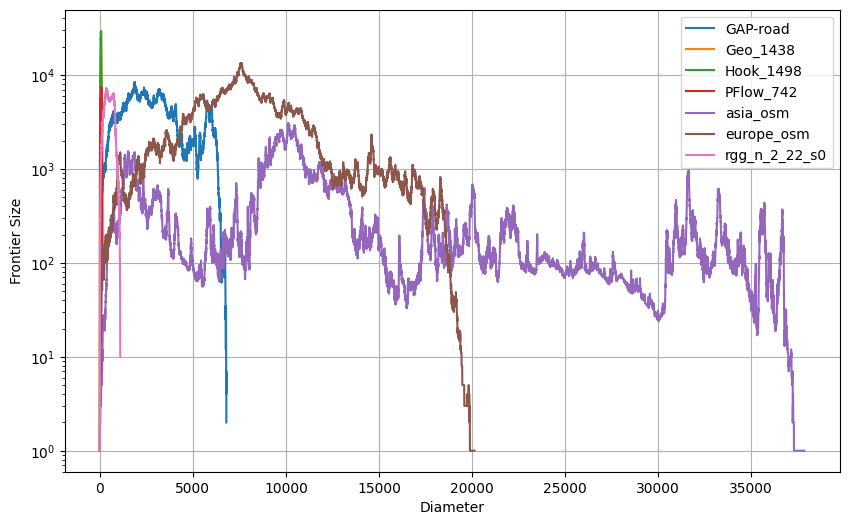

In [9]:
import os
import pandas as pd
import matplotlib.pyplot as plt

# Initialize an empty DataFrame to store all data
data = pd.DataFrame(columns=["Dataset", "Frontier", "Size"])

# Iterate over files in the 'frontiers' folder
folder_path = "../frontiers"
for file_name in os.listdir(folder_path):
  if file_name.endswith(".log"):
    dataset_name = file_name.replace(".log", "")
    file_path = os.path.join(folder_path, file_name)
    
    # Parse the file and collect data
    with open(file_path, "r") as file:
      for line in file:
        if not line.startswith("frontier"):
          continue
        parts = line.strip().split()
        frontier_number = int(parts[1])
        size = int(parts[3])
        data = pd.concat([data, pd.DataFrame([{"Dataset": dataset_name, "Frontier": frontier_number, "Size": size}])], ignore_index=True)

# Convert columns to appropriate data types
data["Frontier"] = data["Frontier"].astype(int)
data["Size"] = data["Size"].astype(int)

# Plot the data
fig, ax = plt.subplots(figsize=(10, 6))
for dataset_name, group in data.groupby("Dataset"):
  ax.plot(group["Frontier"], group["Size"], label=dataset_name)
  ax.set_yscale('log')

plt.xlabel("Diameter")
plt.ylabel("Frontier Size")
plt.legend()
plt.grid()
plt.show()